In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

C:\Users\micha\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\micha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\micha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [14]:
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [1]:
import matplotlib

C:\Users\micha\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\micha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\micha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
url = 'https://en.wikipedia.org/wiki/2022_FIFA_World_Cup'
res = requests.get(url)
content = res.text
soup = BeautifulSoup(content, 'lxml')

In [3]:
match_data = soup.find_all('div', class_='footballbox')

In [6]:
home_team, away_team, score = [], [], []
for match in match_data:
    home_team.append(match.find('th', class_='fhome').get_text())
    score.append(match.find('th', class_='fscore').get_text())
    away_team.append(match.find('th', class_='faway').get_text())

In [7]:
dict_football = {'home_team': home_team, 'score': score, 'away_team': away_team}
df_football = pd.DataFrame(dict_football)

df_football.to_csv("fifa_worldcup_data.csv", index=False)

In [38]:
df_football['home_team'] = df_football['home_team'].str.split().str.join(' ')
df_football['away_team'] = df_football['away_team'].str.split().str.join(' ')

In [67]:
df_football['home_goals'] = ''
df_football['away_goals'] = ''

In [68]:
df_football.head()

,home_team,score,away_team,home_goals,away_goals
0,Qatar,0–2,Ecuador,,
1,Senegal,0–2,Netherlands,,
2,Qatar,1–3,Senegal,,
3,Netherlands,1–1,Ecuador,,
4,Ecuador,1–2,Senegal,,


In [71]:
df_football.loc[0]['score'].split('–')

['0', '2']

In [72]:
for index,row in df_football.iterrows():
    scores = df_football.loc[index]['score'].split('–')
    
    if '(a.e.t.)' in scores[0]:
        scores[0] = scores[0].replace('(a.e.t.)', '')
    if '(a.e.t.)' in scores[1]:
        scores[1] = scores[1].replace('(a.e.t.)', '')

    df_football.iloc[index]['home_goals'] = scores[0]
    df_football.loc[index]['away_goals'] = scores[1]

In [73]:
df_football.head()

,home_team,score,away_team,home_goals,away_goals
0,Qatar,0–2,Ecuador,0,2
1,Senegal,0–2,Netherlands,0,2
2,Qatar,1–3,Senegal,1,3
3,Netherlands,1–1,Ecuador,1,1
4,Ecuador,1–2,Senegal,1,2


# Pre Process

In [1]:
import pandas as pd
df = pd.read_csv("fifa_worldcup_data.csv")

df.head(3)

C:\Users\micha\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\micha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\micha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


,home_team,score,away_team,home_goals,away_goals
0,Qatar,0–2,Ecuador,0,2
1,Senegal,0–2,Netherlands,0,2
2,Qatar,1–3,Senegal,1,3


## home_goals, away_goals

In [3]:
df['home_goals'], df['away_goals'] = '', ''

for index,row in df.iterrows():
    scores = df.loc[index]['score'].split('–')

    # print(scores)
    if '(a.e.t.)' in scores[0]:
        scores[0] = scores[0].replace('(a.e.t.)', '')
    if '(a.e.t.)' in scores[1]:
        scores[1] = scores[1].replace('(a.e.t.)', '')

    df.iloc[index]['home_goals'] = scores[0]
    df.iloc[index]['away_goals'] = scores[1]

df['home_goals'] = df['home_goals'].astype(int)
df['away_goals'] = df['away_goals'].astype(int)

In [56]:
# df['home_team'] = df['home_team'].str.split().str.join(' ')
# df['away_team'] = df['away_team'].str.split().str.join(' ')

In [374]:
df.to_csv('fifa_worldcup_data.csv', index=False)

In [358]:
# df.head(20)

In [361]:
df.head()

,home_team,score,away_team,home_goals,away_goals
0,Qatar,0–2,Ecuador,0,2
1,Senegal,0–2,Netherlands,0,2
2,Qatar,1–3,Senegal,1,3
3,Netherlands,1–1,Ecuador,1,1
4,Ecuador,1–2,Senegal,1,2


In [376]:
df['home_goals'].sum()

101

## mean goals

In [4]:
def metrics(data, home_team, away_team):

        """
            Poisson to calculate the most likely score-line of a match
                calculate the average number of goals each team is likely to score in that match. 
                This can be calculated by determining the “Attack Strength” and “Defence Strength” 
                for each team and comparing them.
        """
        
        df = data
        home_team, away_team = home_team, away_team
        # season averages 
        number_of_games = df.shape[0] # each row is one game
        season_home_goals_scored = df['home_goals'].sum()
        season_away_goals_scored = df['away_goals'].sum()
        seasons_average_home_goals_scored_per_game =  season_home_goals_scored/number_of_games
        seasons_average_away_goals_scored_per_game =  season_away_goals_scored/number_of_games

        #  home attack strength 
        home_number_of_games = df[df['home_team'] == home_team].shape[0]
        home_goals_scored_total = df[df['home_team'] == home_team]['home_goals'].sum()
        home_average_home_goals_per_game = home_goals_scored_total / home_number_of_games
        home_attack_strength = home_average_home_goals_per_game / seasons_average_home_goals_scored_per_game

        # away defence strength
        #     calc away team defence stength (number of goals given up while on road)
        away_number_away_games = df[df['away_team'] == away_team].shape[0]
        away_goals_allowed = df[df['away_team'] == away_team]['home_goals'].sum()
        away_average_goals_conceded  = away_goals_allowed / away_number_away_games
        away_defence_strength = away_average_goals_conceded / seasons_average_home_goals_scored_per_game

        # away attack strength
        away_team_number_home_games = df[df['home_team'] == away_team].shape[0]
        away_team_number_home_goals_scored = df[df['home_team'] == away_team]['home_goals'].sum()
        away_attack_strength = away_team_number_home_goals_scored / away_team_number_home_games
        home_average_home_goals_per_game = home_goals_scored_total / home_number_of_games

        # home defence strength
        home_team_number_away_games = df[df['away_team'] == home_team].shape[0]
        home_team_away_games_goals_conceded = df[df['away_team'] == home_team]['home_goals'].sum()
        home_average_goals_conceded = home_team_away_games_goals_conceded / home_team_number_away_games
        home_defence_strength = home_average_goals_conceded / seasons_average_home_goals_scored_per_game

        results = {
            'home_attack_strength': home_attack_strength,
            'away_attack_strength': away_attack_strength,
            'home_defence_strength': home_defence_strength,
            'away_defence_strength': away_defence_strength,
        }
        return results

In [17]:
df_temp = df
df['home_team_attack_strength'] = ''
df['away_team_attack_strength'] = ''
df['home_team_defence_strength'] = ''
df['away_team_defence_strength'] = ''


for index,row in df.iterrows():
    metrics_per_matchup = metrics(df, row['home_team'], row['away_team'])

    row['home_team_attack_strength'] = metrics_per_matchup['home_attack_strength']
    row['away_team_attack_strength'] = metrics_per_matchup['away_attack_strength']
    row['home_team_defence_strength'] = metrics_per_matchup['home_defence_strength']
    row['away_team_defence_strength'] = metrics_per_matchup['away_defence_strength']
    
    df.loc[index] = row

In [18]:
df.head()

,home_team,score,away_team,home_goals,away_goals,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength,home_team_id,away_team_id,home_win,away_win
0,Qatar,0–2,Ecuador,0,2,0.316832,1.0,1.267327,0.316832,22,10,0,1
1,Senegal,0–2,Netherlands,0,2,0.0,2.0,1.056106,0.0,24,19,0,1
2,Qatar,1–3,Senegal,1,3,0.316832,0.0,1.267327,1.056106,22,24,0,1
3,Netherlands,1–1,Ecuador,1,1,1.267327,1.0,0.0,0.316832,19,10,0,0
4,Ecuador,1–2,Senegal,1,2,0.633663,0.0,0.316832,1.056106,10,24,0,1


## team ids

In [ ]:
mapping

In [9]:
mapping = {'Argentina': 1,
 'Australia': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Cameroon': 5,
 'Canada': 6,
 'Costa Rica': 7,
 'Croatia': 8,
 'Denmark': 9,
 'Ecuador': 10,
 'England': 11,
 'France': 12,
 'Germany': 13,
 'Ghana': 14,
 'Iran': 15,
 'Japan': 16,
 'Mexico': 17,
 'Morocco': 18,
 'Netherlands': 19,
 'Poland': 20,
 'Portugal': 21,
 'Qatar': 22,
 'Saudi Arabia': 23,
 'Senegal': 24,
 'Serbia': 25,
 'South Korea': 26,
 'Spain': 27,
 'Switzerland': 28,
 'Tunisia': 29,
 'United States': 30,
 'Uruguay': 31,
 'Wales': 32
}

In [19]:
df['home_team_id'] = df['home_team']
df['away_team_id'] = df['away_team']
                                      
df['home_team_id'].replace(mapping, inplace=True)
df['away_team_id'].replace(mapping, inplace=True)

In [20]:
df.head(2)

,home_team,score,away_team,home_goals,away_goals,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength,home_team_id,away_team_id,home_win,away_win
0,Qatar,0–2,Ecuador,0,2,0.316832,1.0,1.267327,0.316832,22,10,0,1
1,Senegal,0–2,Netherlands,0,2,0.0,2.0,1.056106,0.0,24,19,0,1


## home_win, away_win bools

In [21]:
df['home_win'], df['away_win'] = 0, 0
for index,row in df.iterrows():
    if row['home_goals'] > row['away_goals']:
        row['home_win']=1
    if row['home_goals'] < row['away_goals']:
        row['away_win']=1
    df.loc[index] = row

In [13]:
df.to_csv('fifa_data_with_metrics.csv', index=False)

### FinalTimeResult

In [22]:
df['FTR'] = ''
for index,row in df.iterrows():
    if row['home_goals'] > row['away_goals']:
        row['FTR'] = 2
    if row['home_goals'] == row['away_goals']:
        row['FTR'] = 1
    if row['home_goals'] < row['away_goals']:
        row['FTR'] = 0
    df.loc[index] = row

## team_id_to_name()

In [14]:
def team_id_to_name(team_id, mapping):
    return list(mapping.keys())[list(mapping.values()).index(team_id)]

# Poisson Distribution

note, Poisson looks at goals scored per team to come up with distributions.

Don't need all the features.

## scratch

In [214]:
# season’s average home goals scored per game
# season’s average goals conceded by an away team per game
seasons_average_home_goals_scored_per_game =  101/64
seasons_average_home_goals_scored_per_game

1.578125

In [ ]:
print(df['home_goals'].sum())

In [75]:
print(df[df['home_team'] == 'Brazil']['home_goals'].sum())
df[df['home_team'] == 'Brazil']

7


,home_team,score,away_team,home_goals,away_goals
37,Brazil,2–0,Serbia,2,0
39,Brazil,1–0,Switzerland,1,0
53,Brazil,4–1,South Korea,4,1


### home attack strength

In [90]:
home_number_of_games = 3
brazil_average_home_goals_per_game = 7 / home_number_of_games
brazil_average_home_goals_per_game

2.3333333333333335

In [96]:
brazil_attack_strength = brazil_average_home_goals_per_game / 1.578125
brazil_attack_strength

1.4785478547854787

### away defence strength

In [94]:
print(df[df['away_team'] == 'Argentina']['home_goals'].sum())
df[df['away_team'] == 'Argentina']

2


,home_team,score,away_team,home_goals,away_goals
16,Poland,0–2,Argentina,0,2
57,Netherlands,2–2 (a.e.t.),Argentina,2,2


In [95]:
argentina_number_away_games = 2
2 / argentina_number_away_games

1.0

In [78]:
print(df[df['away_team'] == 'Argentina']['away_goals'].sum())
df[df['away_team'] == 'Argentina']

4


,home_team,score,away_team,home_goals,away_goals
16,Poland,0–2,Argentina,0,2
57,Netherlands,2–2 (a.e.t.),Argentina,2,2


In [99]:
argentina_defence_strength = 1.0 / 1.578125
argentina_defence_strength

0.6336633663366337

### pred home goals scoared

In [108]:
# number of goals Brazil scores against Argentina
predict_brazil_goals = brazil_attack_strength * argentina_defence_strength * 1.578125
predict_brazil_goals

1.4785478547854787

### away attack strength

In [77]:
print(df[df['home_team'] == 'Argentina']['home_goals'].sum())
df[df['home_team'] == 'Argentina']

11


,home_team,score,away_team,home_goals,away_goals
12,Argentina,1–2,Saudi Arabia,1,2
15,Argentina,2–0,Mexico,2,0
49,Argentina,2–1,Australia,2,1
60,Argentina,3–0,Croatia,3,0
63,Argentina,3–3 (a.e.t.),France,3,3


In [101]:
home_number_of_games = 5
argentina_attack_strength = 11 / home_number_of_games
argentina_attack_strength

2.2

### home defence strength

In [102]:
print(df[df['away_team'] == 'Brazil']['home_goals'].sum())
df[df['away_team'] == 'Brazil']

2


,home_team,score,away_team,home_goals,away_goals
41,Cameroon,1–0,Brazil,1,0
56,Croatia,1–1 (a.e.t.),Brazil,1,1


In [104]:
brazil_number_away_games = 2
2 / brazil_number_away_games

1.0

In [105]:
brazil_defence_strength = 1.0 / 1.578125
brazil_defence_strength

0.6336633663366337

### pred away goals

In [107]:
# number of goals Argentina scores against Brazil
predict_argentina_goals = argentina_attack_strength * brazil_defence_strength * 1.578125
predict_argentina_goals

2.2

In [109]:
print(f"Brazil: {predict_brazil_goals}")
print(f"Arg: {predict_argentina_goals}")

Brazil: 1.4785478547854787
Arg: 2.2


In [120]:
# Probability Mass Function (PMF) for the Poisson Distribution
# prob argentina scores 0 goals, 1 goal, ect
argentina_p_dist = [poisson.pmf(x, 2.2) for x in range(0,6)]
argentina_p_dist

[0.11080315836233387,
 0.2437669483971345,
 0.26814364323684803,
 0.19663867170702193,
 0.10815126943886204,
 0.04758655855309931]

In [119]:
brazil_p_dist = [poisson.pmf(x, predict_brazil_goals) for x in range(0,6)]
brazil_p_dist

[0.22796849149258858,
 0.3370623240550485,
 0.2491813880802999,
 0.12280886893286505,
 0.045394697427329656,
 0.013423646499962841]

In [126]:
# assume Brzil v Arg
zero_zero = brazil_p_dist[0] * argentina_p_dist[0]
zero_one = brazil_p_dist[0] * argentina_p_dist[1]
zero_two = brazil_p_dist[0] * argentina_p_dist[2]
zero_three = brazil_p_dist[0] * argentina_p_dist[3]
zero_four = brazil_p_dist[0] * argentina_p_dist[4]
zero_five = brazil_p_dist[0] * argentina_p_dist[5]

print(zero_zero)
print(zero_one)
print(zero_two)
print(zero_three)
print(zero_four)
print(zero_five)

0.025259628864475654
0.055571183501846436
0.061128301852031094
0.04482742135815615
0.024655081746985875
0.010848235968673788


In [ ]:
one_zero = brazil_p_dist[1] * argentina_p_dist[0]
one_one = brazil_p_dist[1] * argentina_p_dist[1]
one_two = brazil_p_dist[1] * argentina_p_dist[2]
one_three = brazil_p_dist[1] * argentina_p_dist[3]
one_four = brazil_p_dist[1] * argentina_p_dist[4]
one_five = brazil_p_dist[1] * argentina_p_dist[5]

In [129]:
results = {}

for home_goals in range(0,6):
    for away_goals in range(0,6):
        score = f"{home_goals}_{away_goals}"
        
        results[score] =  brazil_p_dist[home_goals] * argentina_p_dist[away_goals]

In [132]:
# key w/ max value
v = list(results.values())
k = list(results.keys())

money_line = k[v.index(max(v))]
money_line_odds = results[money_line]
print(f"Pred Outcome: {money_line}: {money_line_odds}")

Pred Outcome: 1_2: 0.09038111956999978


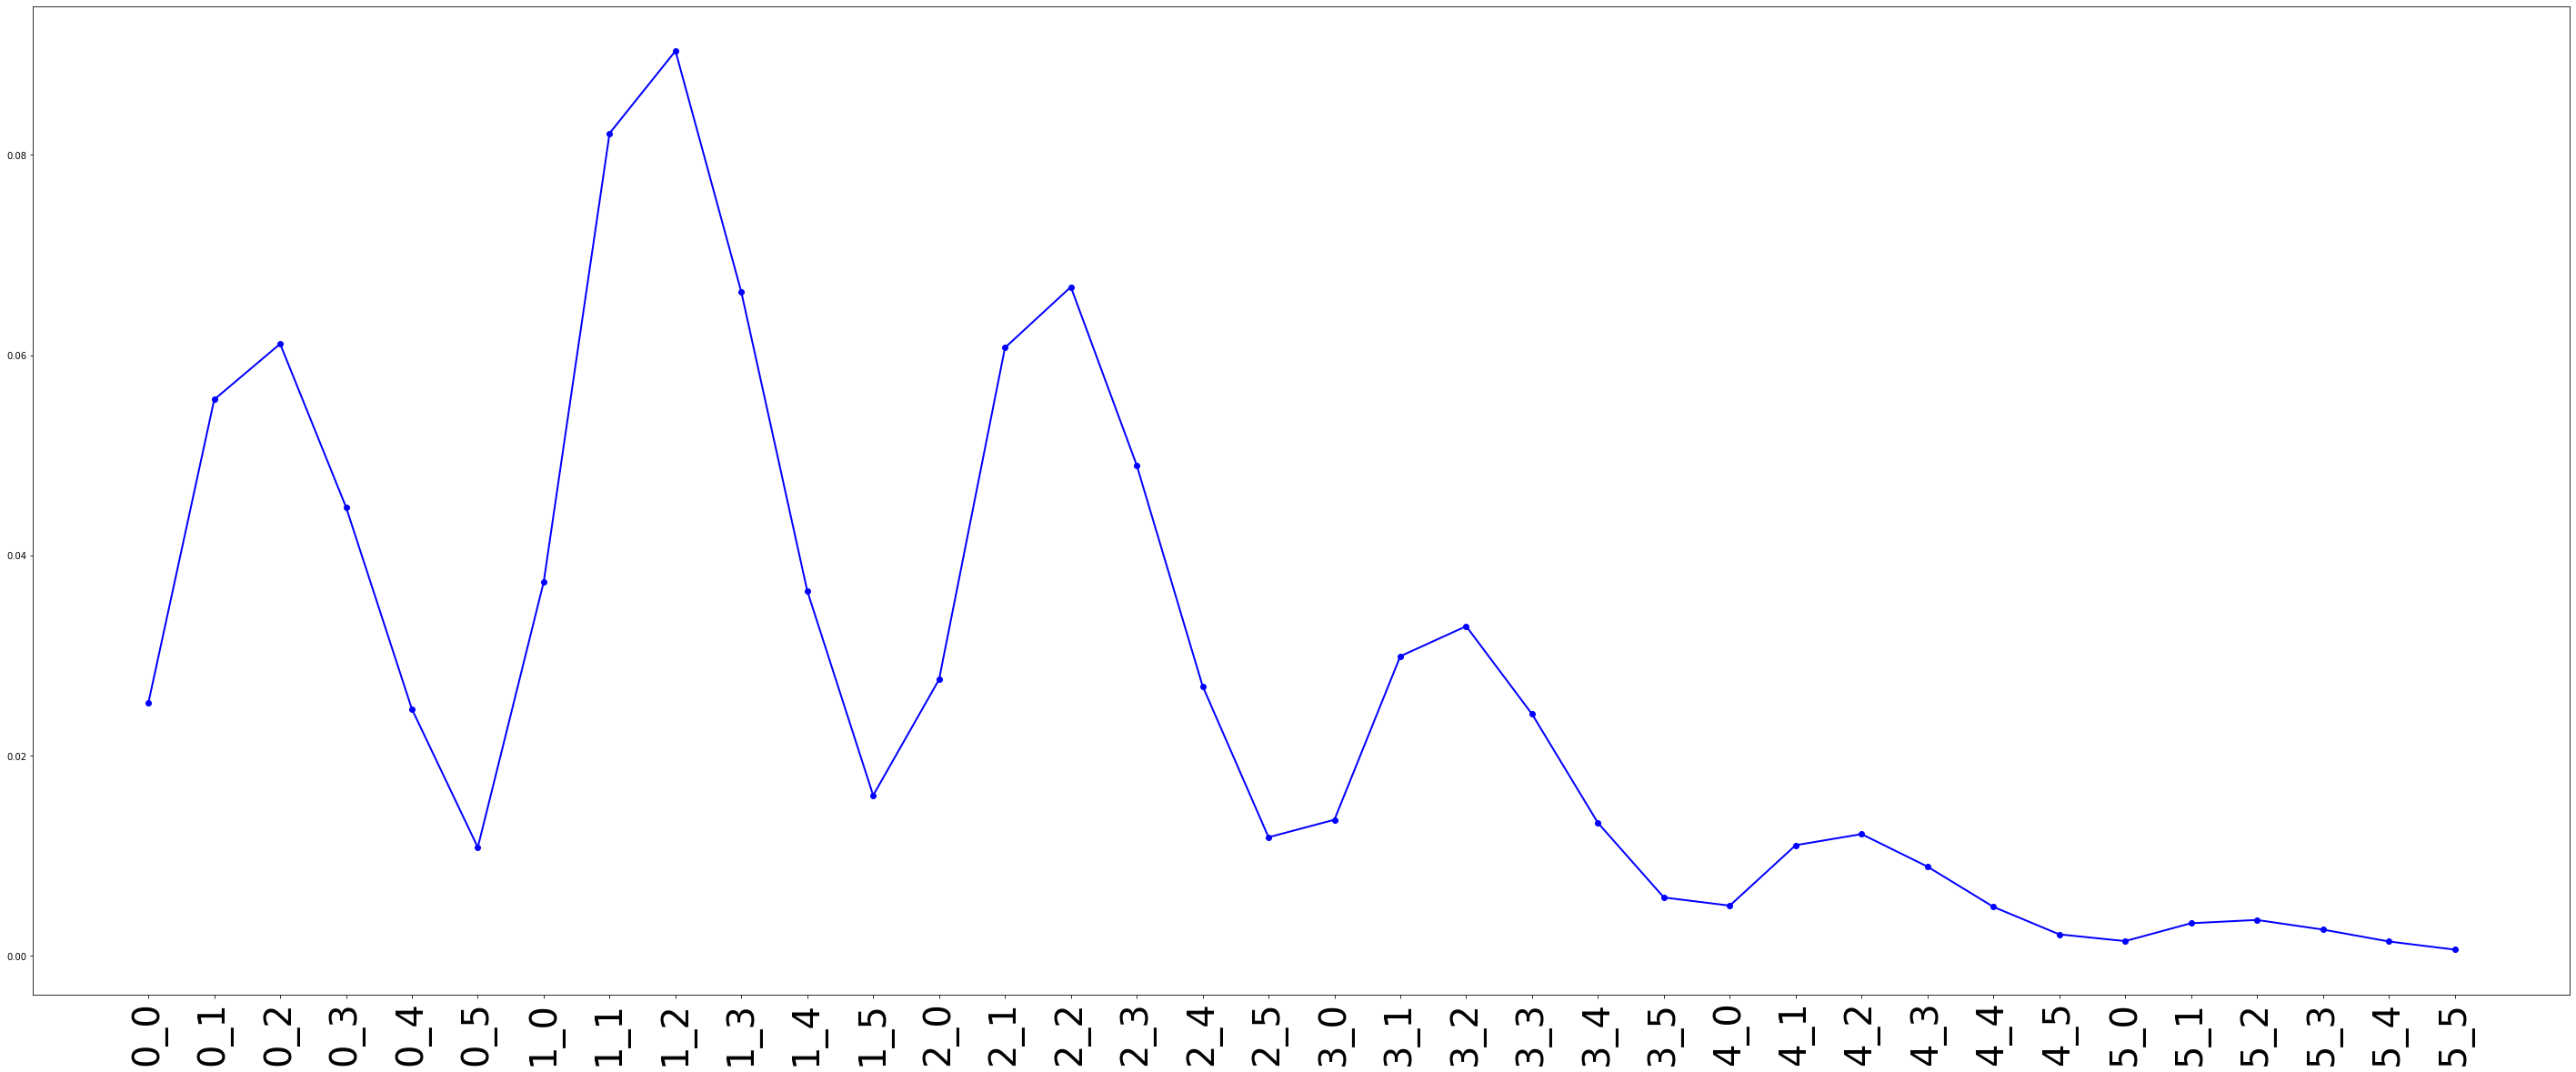

In [146]:
width = 50
height = 20
plt.figure(figsize=(width, height)) 
plt.xticks(fontsize=40, rotation=90)

plt.plot(k, v, 'bo-', linewidth=2)

In [133]:
results

{'0_0': 0.025259628864475654,
 '0_1': 0.055571183501846436,
 '0_2': 0.061128301852031094,
 '0_3': 0.04482742135815615,
 '0_4': 0.024655081746985875,
 '0_5': 0.010848235968673788,
 '1_0': 0.03734757007024783,
 '1_1': 0.08216465415454523,
 '1_2': 0.09038111956999978,
 '1_3': 0.06627948768466652,
 '1_4': 0.03645371822656658,
 '1_5': 0.0160396360196893,
 '2_0': 0.027610084804407645,
 '2_1': 0.060742186569696814,
 '2_2': 0.06681640522666651,
 '2_3': 0.04899869716622212,
 '2_4': 0.02694928344142216,
 '2_5': 0.011857684714225753,
 '3_0': 0.01360761055266735,
 '3_1': 0.02993674321586817,
 '3_2': 0.032930417537454994,
 '3_3': 0.024148972860800335,
 '3_4': 0.013281935073440181,
 '3_5': 0.005844051432313682,
 '4_0': 0.005029875847850637,
 '4_1': 0.011065726865271403,
 '4_2': 0.012172299551798545,
 '4_3': 0.00892635300465227,
 '4_4': 0.004909494152558747,
 '4_5': 0.002160177427125849,
 '5_0': 0.0014873824289353714,
 '5_1': 0.003272241343657817,
 '5_2': 0.0035994654780236,
 '5_3': 0.002639608017217

## single function

In [362]:
df.head()

,home_team,score,away_team,home_goals,away_goals
0,Qatar,0–2,Ecuador,0,2
1,Senegal,0–2,Netherlands,0,2
2,Qatar,1–3,Senegal,1,3
3,Netherlands,1–1,Ecuador,1,1
4,Ecuador,1–2,Senegal,1,2


In [223]:
from scipy.stats import poisson

In [377]:
class Poisson_Model:
    def __init__(self, df, home_team, away_team):
        self.df = df
        self.home_team = home_team
        self.away_team = away_team


    def predict_goals(self):
        """
            Poisson to calculate the most likely score-line of a match
                calculate the average number of goals each team is likely to score in that match. 
                This can be calculated by determining the “Attack Strength” and “Defence Strength” 
                for each team and comparing them.
                
                Returns Mean goals scored for home and away
        """
        df = self.df
        home_team, away_team = self.home_team, self.away_team
        # season averages 
        number_of_games = df.shape[0] # each row is one game
        season_home_goals_scored = df['home_goals'].sum()
        season_away_goals_scored = df['away_goals'].sum()
        seasons_average_home_goals_scored_per_game =  season_home_goals_scored/number_of_games
        seasons_average_away_goals_scored_per_game =  season_away_goals_scored/number_of_games

        #  home attack strength 
        home_number_of_games = df[df['home_team'] == home_team].shape[0]
        home_goals_scored_total = df[df['home_team'] == home_team]['home_goals'].sum()
        home_average_home_goals_per_game = home_goals_scored_total / home_number_of_games
        home_attack_strength = home_average_home_goals_per_game / seasons_average_home_goals_scored_per_game

        # away defence strength
        #     calc away team defence stength (number of goals given up while on road)
        away_number_away_games = df[df['away_team'] == away_team].shape[0]
        away_goals_allowed = df[df['away_team'] == away_team]['home_goals'].sum()
        away_average_goals_conceded  = away_goals_allowed / away_number_away_games
        away_defence_strength = away_average_goals_conceded / seasons_average_home_goals_scored_per_game

        # away attack strength
        away_team_number_home_games = df[df['home_team'] == away_team].shape[0]
        away_team_number_home_goals_scored = df[df['home_team'] == away_team]['home_goals'].sum()
        away_attack_strength = away_team_number_home_goals_scored / away_team_number_home_games
        home_average_home_goals_per_game = home_goals_scored_total / home_number_of_games

        # home defence strength
        home_team_number_away_games = df[df['away_team'] == home_team].shape[0]
        home_team_away_games_goals_conceded = df[df['away_team'] == home_team]['home_goals'].sum()
        home_average_goals_conceded = home_team_away_games_goals_conceded / home_team_number_away_games
        home_defence_strength = home_average_goals_conceded / seasons_average_home_goals_scored_per_game

        # predict home goals scored
        predict_home_goals = home_attack_strength * away_defence_strength *seasons_average_home_goals_scored_per_game
        # predict away goals scored
        predict_away_goals = away_attack_strength * home_defence_strength * seasons_average_away_goals_scored_per_game

        return [predict_home_goals, predict_away_goals]

    def poisson_ditribution_max(self, pred_home_goals,
            pred_away_goals
        ):
        away_p_dist = [poisson.pmf(x, predict_away_goals) for x in range(0,6)]
        home_p_dist = [poisson.pmf(x, predict_home_goals) for x in range(0,6)]
        
        results = {}
        for home_goals in range(0,6):
            for away_goals in range(0,6):
                score = f"{home_goals}_{away_goals}"
                results[score] =  home_p_dist[home_goals] * away_p_dist[away_goals]
                
        # key w/ max value
        v = list(results.values())
        k = list(results.keys())

        pred_correct_score = k[v.index(max(v))]
        correct_score_odds = results[money_line]
        print(f"Pred Outcome: {pred_correct_score}: {correct_score_odds}")
        return [pred_correct_score, correct_score_odds]

In [380]:
home_team = 'Brazil'
away_team = 'Argentina'

p = Poisson_Model(df=df,
    home_team = home_team,
    away_team = away_team,
)

In [381]:
home_goals_poisson_pred, away_goals_poisson_pred = p.predict_goals()
print(f"Pred: {home_team}v{away_team}: {home_goals_poisson_pred}-{away_goals_poisson_pred}")

Pred: BrazilvArgentina: 1.4785478547854787-1.5465346534653466


In [382]:
p.poisson_ditribution_max(home_goals_poisson_pred,away_goals_poisson_pred)

Pred Outcome: 1_2: 0.09104822803493318


['1_2', 0.09104822803493318]

## validate (62.5%)

In [265]:
count=1
accuracy_count=0
for index,row in df.iterrows():
    # print(row)

    p = Poisson_Model(df=df,
        home_team = row['home_team'],
        away_team = row['away_team'],
    )
    pred_home, pred_away = p.poisson_average()

    pred_home = str(pred_home)[:4]
    pred_away = str(pred_away)[:4]

    if pred_home>=pred_away:
        if row['home_win'] ==1:
            # print(f"{row['home_team']} v {row['away_team']}: {row['score']}. Pred: {pred_home}-{pred_away}")
            accuracy_count+=1
    if pred_home<=pred_away:
        if row['home_win'] ==0:
            # print(f"{row['home_team']} v {row['away_team']}: {row['score']}. Pred: {pred_home}-{pred_away}")
            accuracy_count+=1

    # if count>2:
    #     break
    # count+=1

In [266]:
accuracy_count/number_of_games

0.625

## more scratch

In [216]:
number_of_games = df.shape[0] # each row is one game & don't count header row
season_home_goales_scored = df['home_goals'].sum()

seasons_average_home_goals_scored_per_game =  season_home_goales_scored/number_of_games
seasons_average_home_goals_scored_per_game

1.578125

In [169]:
home_team = 'Brazil'

In [173]:
df[df['home_team'] == home_team]

,home_team,score,away_team,home_goals,away_goals,home_team_id,away_team_id,home_win,away_win
37,Brazil,2–0,Serbia,2,0,4,25,1,0
39,Brazil,1–0,Switzerland,1,0,4,28,1,0
53,Brazil,4–1,South Korea,4,1,4,26,1,0


In [181]:
home_number_of_games = df[df['home_team'] == home_team].shape[0]
home_goals_scored_total = df[df['home_team'] == home_team]['home_goals'].sum()

home_average_home_goals_per_game = home_goals_scored_total / home_number_of_games
home_average_home_goals_per_game

2.3333333333333335

In [211]:
seasons_average_home_goals_scored_per_game

1.6031746031746033

In [195]:
home_attack_strength = home_average_home_goals_per_game / seasons_average_home_goals_scored_per_game
home_attack_strength

1.4554455445544554

In [187]:
away_team = 'Argentina'
print(df[df['away_team'] == 'Argentina']['home_goals'].sum())
df[df['away_team'] == 'Argentina']

2


,home_team,score,away_team,home_goals,away_goals,home_team_id,away_team_id,home_win,away_win
16,Poland,0–2,Argentina,0,2,20,1,0,1
57,Netherlands,2–2 (a.e.t.),Argentina,2,2,19,1,0,0


In [189]:
# calc away team defence stength (number of goals given up while on road)
away_goals_allowed = df[df['away_team'] == away_team]['home_goals'].sum()
away_goals_allowed

2

In [190]:
away_number_away_games = df[df['away_team'] == 'Argentina'].shape[0]
away_average_goals_conceded  = away_goals_allowed / away_number_away_games
away_average_goals_conceded

1.0

In [192]:
away_defence_strength = away_average_goals_conceded / seasons_average_home_goals_scored_per_game
away_defence_strength

0.6237623762376238

In [197]:
predict_home_goals = home_attack_strength * away_defence_strength *seasons_average_home_goals_scored_per_game
predict_home_goals

1.4554455445544554

In [199]:
print(df[df['home_team'] == away_team]['home_goals'].sum())
df[df['home_team'] == away_team]

11


,home_team,score,away_team,home_goals,away_goals,home_team_id,away_team_id,home_win,away_win
12,Argentina,1–2,Saudi Arabia,1,2,1,23,0,1
15,Argentina,2–0,Mexico,2,0,1,17,1,0
49,Argentina,2–1,Australia,2,1,1,2,1,0
60,Argentina,3–0,Croatia,3,0,1,8,1,0
63,Argentina,3–3 (a.e.t.),France,3,3,1,12,0,0


In [200]:
away_team_number_home_games = df[df['home_team'] == away_team].shape[0]
away_team_number_home_goals_scored = df[df['home_team'] == away_team]['home_goals'].sum()
away_attack_strength = away_team_number_home_goals_scored / away_team_number_home_games
away_attack_strength

2.2

In [202]:
print(df[df['away_team'] == 'Brazil']['home_goals'].sum())
df[df['away_team'] == 'Brazil']

2


,home_team,score,away_team,home_goals,away_goals,home_team_id,away_team_id,home_win,away_win
41,Cameroon,1–0,Brazil,1,0,5,4,1,0
56,Croatia,1–1 (a.e.t.),Brazil,1,1,8,4,0,0


In [208]:
home_team_number_away_games = df[df['away_team'] == home_team].shape[0]
home_team_away_games_goals_conceded = df[df['away_team'] == home_team]['home_goals'].sum()
home_average_goals_conceded = home_team_away_games_goals_conceded / home_team_number_away_games
home_average_goals_conceded

1.0

In [217]:
home_defence_strength = home_average_goals_conceded / seasons_average_home_goals_scored_per_game
home_defence_strength

0.6336633663366337

In [219]:
predict_away_goals = away_attack_strength * home_defence_strength * seasons_average_home_goals_scored_per_game
predict_away_goals

2.2

In [221]:
print(f"Home: {predict_home_goals}")
print(f"Away: {predict_away_goals}")

Home: 1.4554455445544554
Away: 2.2


In [224]:
# Probability Mass Function (PMF) for the Poisson Distribution
# prob argentina scores 0 goals, 1 goal, ect
away_p_dist = [poisson.pmf(x, predict_away_goals) for x in range(0,6)]
away_p_dist

[0.11080315836233387,
 0.2437669483971345,
 0.26814364323684803,
 0.19663867170702193,
 0.10815126943886204,
 0.04758655855309931]

In [225]:
home_p_dist = [poisson.pmf(x, predict_home_goals) for x in range(0,6)]
home_p_dist

[0.2332963968027144,
 0.339550201287119,
 0.24709841380795294,
 0.11987942848108611,
 0.04361949501663279,
 0.012697159935534708]

In [226]:
results = {}

for home_goals in range(0,6):
    for away_goals in range(0,6):
        score = f"{home_goals}_{away_goals}"
        results[score] =  home_p_dist[home_goals] * away_p_dist[away_goals]

In [227]:
# key w/ max value
v = list(results.values())
k = list(results.keys())

money_line = k[v.index(max(v))]
money_line_odds = results[money_line]
print(f"Pred Outcome: {money_line}: {money_line_odds}")

Pred Outcome: 1_2: 0.09104822803493318


In [134]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Set the Poisson parameter and the range of k values
lam = 2
k_values = np.arange(0, 11)

In [5]:
k_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# Calculate the PMF using the Scipy library
pmf_values = poisson.pmf(k_values, lam)

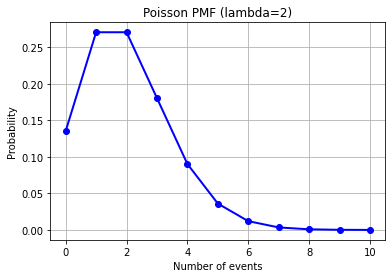

In [7]:
# Plot the PMF using Matplotlib
plt.plot(k_values, pmf_values, 'bo-', linewidth=2)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Poisson PMF (lambda=2)')
plt.grid(True)
plt.show()

In [10]:
from scipy.stats import poisson

In [ ]:
home_team='Qatar'
away_team='Ecuador'
 
home_team_score = 0
away_team_score = 2

In [11]:
lambda_home_team = df_football.at[home_team,home_team_score] * df_football.at[away_team,home_team_score]
lambda_away_team = df_football.at[away_team,away_team_score] * df_football.at[home_team,home_team_score]

NameError: name 'df_football' is not defined

In [ ]:
p = poisson.pmf(x, lambda_home_team) * poisson.pmf(y, lambda_away_team)

In [11]:
def predict(home_team, away_team):

    # Calculate the value of lambda (λ) for both Home Team and Away Team.
    if home_team in df_football.index and away_team in df_football.index:
        lambda_home_team = df_football.at[home_team,'GoalsScored'] * df_football.at[away_team,'GoalsConceded']
        lambda_away_team = df_football.at[away_team,'GoalsScored'] * df_football.at[home_team,'GoalsConceded']

In [14]:
x = 
p = poisson.pmf(x, lambda_home_team) * poisson.pmf(y, lambda_away_team)
if x == y:
    pr_draw += p
elif x > y:
    pr_home += p
else:
    pr_away += p

NameError: name 'x' is not defined

KeyError: 0

In [42]:
df_football.at[0,'score']

'0–2'

In [46]:
df_football.at[0,home_team_score]

KeyError: 0

In [15]:
points_home_team = 3 * pr_home + pr_draw
points_away_team = 3 * pr_away + pr_draw

NameError: name 'p' is not defined

# SVM

less accuruate than Poisson because we added features to Poisson Model 

(attack strength, defence strength)

In [32]:
import pandas as pd
df = pd.read_csv("fifa_worldcup_data.csv")

df.head(3)

,home_team,score,away_team,home_goals,away_goals
0,Qatar,0–2,Ecuador,0,2
1,Senegal,0–2,Netherlands,0,2
2,Qatar,1–3,Senegal,1,3


In [27]:
import sklearn

In [28]:
from sklearn.svm import SVC

In [29]:
from sklearn.model_selection import train_test_split

In [37]:
df.head()

,home_team,score,away_team,home_goals,away_goals
0,Qatar,0–2,Ecuador,0,2
1,Senegal,0–2,Netherlands,0,2
2,Qatar,1–3,Senegal,1,3
3,Netherlands,1–1,Ecuador,1,1
4,Ecuador,1–2,Senegal,1,2


In [2]:
# mapping

In [3]:
mapping = {'Argentina': 1,
 'Australia': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Cameroon': 5,
 'Canada': 6,
 'Costa Rica': 7,
 'Croatia': 8,
 'Denmark': 9,
 'Ecuador': 10,
 'England': 11,
 'France': 12,
 'Germany': 13,
 'Ghana': 14,
 'Iran': 15,
 'Japan': 16,
 'Mexico': 17,
 'Morocco': 18,
 'Netherlands': 19,
 'Poland': 20,
 'Portugal': 21,
 'Qatar': 22,
 'Saudi Arabia': 23,
 'Senegal': 24,
 'Serbia': 25,
 'South Korea': 26,
 'Spain': 27,
 'Switzerland': 28,
 'Tunisia': 29,
 'United States': 30,
 'Uruguay': 31,
 'Wales': 32
}

In [34]:
df_format = df

In [38]:
df_format['home_team_id'] = df_format['home_team']
df_format['away_team_id'] = df_format['away_team']
                                      
df_format['home_team_id'].replace(mapping, inplace=True)
df_format['away_team_id'].replace(mapping, inplace=True)
df_format.head()

,home_team,score,away_team,home_goals,away_goals,home_team_id,away_team_id
0,Qatar,0–2,Ecuador,0,2,22,10
1,Senegal,0–2,Netherlands,0,2,24,19
2,Qatar,1–3,Senegal,1,3,22,24
3,Netherlands,1–1,Ecuador,1,1,19,10
4,Ecuador,1–2,Senegal,1,2,10,24


In [39]:
df_format['home_win'], df_format['away_win'] = 0, 0
for index,row in df_format.iterrows():
    if row['home_goals'] > row['away_goals']:
        row['home_win']=1
    if row['home_goals'] < row['away_goals']:
        row['away_win']=1
    df_format.loc[index] = row
df_format.head(10)

,home_team,score,away_team,home_goals,away_goals,home_team_id,away_team_id,home_win,away_win
0,Qatar,0–2,Ecuador,0,2,22,10,0,1
1,Senegal,0–2,Netherlands,0,2,24,19,0,1
2,Qatar,1–3,Senegal,1,3,22,24,0,1
3,Netherlands,1–1,Ecuador,1,1,19,10,0,0
4,Ecuador,1–2,Senegal,1,2,10,24,0,1
5,Netherlands,2–0,Qatar,2,0,19,22,1,0
6,England,6–2,Iran,6,2,11,15,1,0
7,United States,1–1,Wales,1,1,30,32,0,0
8,Wales,0–2,Iran,0,2,32,15,0,1
9,England,0–0,United States,0,0,11,30,0,0


## train

In [338]:
# features
x = df_format.loc[:, ['home_team_id', 'away_team_id', 'home_goals', 'away_goals']]
y = df_format.loc[:, ['home_goals']] #  65% acc


# ValueError: y should be a 1d array, got an array of shape (44, 4) instead.
# y = df_format.loc[:, ['home_team', 'away_team', 'home_goals', 'away_goals']]

In [339]:
print(x.shape)
x.head(3)

(64, 4)


,home_team_id,away_team_id,home_goals,away_goals
0,22,10,0,2
1,24,19,0,2
2,22,24,1,3


In [340]:
print(y.shape)
y.head(3)

(64, 1)


,home_goals
0,0
1,0
2,1


In [341]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30) 

In [103]:
# DataConversionWarning: A column-vector y was passed when a 1d array was expected. 
# Please change the shape of y to (n_samples, ), for example using ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.30) 

In [342]:
print(y_test.shape)
print(x_test.shape)

(20, 1)
(20, 4)


In [343]:
print(y_train.shape)
print(x_train.shape)

(44, 1)
(44, 4)


In [107]:
x_train

,home_team_id,away_team_id,home_goals,away_goals
53,4,26,4,1
5,19,22,2,0
63,1,12,3,3
29,7,13,2,4
1,24,19,0,2
3,19,10,1,1
54,18,27,0,0
32,3,18,0,2
35,6,18,1,2
59,11,12,1,2


In [106]:
y_train

array([4, 2, 3, 2, 0, 1, 0, 0, 1, 1, 4, 0, 2, 1, 2, 0, 1, 3, 0, 1, 2, 4,
       6, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 6, 3, 2, 1, 0, 0, 7, 1, 0, 2],
      dtype=int64)

In [108]:
svc_predict = SVC()

In [109]:
svc_predict.fit(x_train, y_train)

SVC()

In [115]:
x_test.head(50)

,home_team_id,away_team_id,home_goals,away_goals
26,16,7,0,1
48,19,30,3,1
23,29,12,1,0
13,17,20,0,0
62,8,18,2,1
14,20,23,2,0
0,22,10,0,2
24,13,16,1,2
43,21,14,3,2
45,21,31,2,0


In [344]:
svc_predict.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [351]:
x_test[:3]

,home_team_id,away_team_id,home_goals,away_goals
34,8,3,0,0
20,29,2,0,1
37,4,25,2,0


In [352]:
x.shape

(64, 4)

## validate

In [353]:
accuracy_count = 0
for index,row in x_test[:].iterrows():
    try: 
        # svc_predict.predict(row)
        home_team = list(mapping.keys())[list(mapping.values()).index(row['home_team_id'])]
        away_team = list(mapping.keys())[list(mapping.values()).index(row['away_team_id'])]

        pred_ = svc_predict.predict([x_test.loc[index]])[0]
        # print(pred_)

        if pred_==1:
            if row['home_goals'] >= row['away_goals']:
                print(f"{home_team} v {away_team}: {row['home_goals']}-{row['away_goals']}") 
                accuracy_count+=1
        if pred_==0:
            if row['home_goals'] <= row['away_goals']:
                print(f"{home_team} v {away_team}: {row['home_goals']}-{row['away_goals']}") 
                accuracy_count+=1
    except Exception as e: 
        print(f"err: {row}")
        print(e)

Croatia v Belgium: 0-0
Tunisia v Australia: 0-1
Denmark v Tunisia: 0-0
Wales v England: 0-3
Netherlands v Ecuador: 1-1
Cameroon v Serbia: 3-3
Wales v Iran: 0-2
Morocco v Spain: 0-0
Iran v United States: 0-1
Serbia v Switzerland: 2-3
Morocco v Croatia: 0-0
Morocco v Portugal: 1-0
France v Denmark: 2-1
Croatia v Canada: 4-1


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\

In [354]:
print(f"correct: {accuracy_count}")
print(f"%: {accuracy_count/x.shape[0]}")

correct: 14
%: 0.21875


In [123]:
mapping

{'Argentina': 1,
 'Australia': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Cameroon': 5,
 'Canada': 6,
 'Costa Rica': 7,
 'Croatia': 8,
 'Denmark': 9,
 'Ecuador': 10,
 'England': 11,
 'France': 12,
 'Germany': 13,
 'Ghana': 14,
 'Iran': 15,
 'Japan': 16,
 'Mexico': 17,
 'Morocco': 18,
 'Netherlands': 19,
 'Poland': 20,
 'Portugal': 21,
 'Qatar': 22,
 'Saudi Arabia': 23,
 'Senegal': 24,
 'Serbia': 25,
 'South Korea': 26,
 'Spain': 27,
 'Switzerland': 28,
 'Tunisia': 29,
 'United States': 30,
 'Uruguay': 31,
 'Wales': 32}

In [124]:
print(list(mapping.keys())[list(mapping.values()).index(17)])

Mexico


## train w/ more features (65%)

In [491]:
# features
x = df_temp.loc[:, ['home_team_id', 'away_team_id', 'home_team_attack_strength',
                      'away_team_attack_strength', 'home_team_defence_strength', 'away_team_defence_strength']
                 ]
y = df_temp.loc[:, ['home_win']]

In [492]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30) 
# x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.30) 

In [494]:
svc_predict = SVC()
svc_predict.fit(x_train, y_train)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [495]:
svc_predict.predict(x_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [485]:
x_test.head(3)

,home_team_id,away_team_id,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength
51,11,24,1.584158,0.0,0.0,1.056106
52,16,8,0.633663,1.75,0.633663,0.844884
48,19,30,1.267327,1.0,0.0,0.633663


In [486]:
df.loc[x_test.index].head(3)

,home_team,score,away_team,home_goals,away_goals,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength,home_team_id,away_team_id,home_win,away_win
51,England,3–0,Senegal,3,0,1.584158,0.0,0.0,1.056106,11,24,1,0
52,Japan,1–1 (a.e.t.),Croatia,1,1,0.633663,1.75,0.633663,0.844884,16,8,0,0
48,Netherlands,3–1,United States,3,1,1.267327,1.0,0.0,0.633663,19,30,1,0


In [497]:
accuracy_count = 0
for index,row in x_test[:].iterrows():
    try: 
        home_team = list(mapping.keys())[list(mapping.values()).index(row['home_team_id'])]
        away_team = list(mapping.keys())[list(mapping.values()).index(row['away_team_id'])]

        pred_ = svc_predict.predict([x_test.loc[index]])[0]

        if pred_==1:
            if df.loc[index]['home_goals'] >= df.loc[index]['away_goals']:
                print(f"{home_team} v {away_team}: {df.loc[index]['home_goals']}-{df.loc[index]['away_goals']}") 
                accuracy_count+=1
        if pred_==0:
            if df.loc[index]['home_goals'] <= df.loc[index]['away_goals']:
                print(f"{home_team} v {away_team}: {df.loc[index]['home_goals']}-{df.loc[index]['away_goals']}") 
                accuracy_count+=1
    except Exception as e: 
        print(f"err: {row}")
        print(e)

England v United States: 0-0
Brazil v Switzerland: 1-0
England v Iran: 6-2
Croatia v Belgium: 0-0
Belgium v Canada: 1-0
Argentina v France: 3-3
Croatia v Canada: 4-1
Serbia v Switzerland: 2-3
Senegal v Netherlands: 0-2
Japan v Spain: 2-1
Netherlands v Argentina: 2-2
Brazil v South Korea: 4-1
Qatar v Ecuador: 0-2


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\micha\

In [498]:
accuracy_count / x_test.shape[0]

0.65

### predict FinalTimeResult

In [57]:
# features
x = df.loc[:, ['home_team_id', 'away_team_id', 'home_team_attack_strength',
                      'away_team_attack_strength', 'home_team_defence_strength', 'away_team_defence_strength']
                 ]
y = df.loc[:, ['FTR']]
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values.ravel(), test_size=0.30) 

In [63]:
x.head(3)

,home_team_id,away_team_id,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength
0,22,10,0.316832,1.0,1.267327,0.316832
1,24,19,0.0,2.0,1.056106,0.0
2,22,24,0.316832,0.0,1.267327,1.056106


In [65]:
x.values[0]

array([22, 10, 0.31683168316831684, 1.0, 1.2673267326732673,
       0.31683168316831684], dtype=object)

In [66]:
x.values[1]

array([24, 19, 0.0, 2.0, 1.0561056105610562, 0.0], dtype=object)

In [58]:
svc_predict = SVC()
svc_predict.fit(x_train, y_train)

SVC()

In [60]:
accuracy_count = 0
# for index,row in x_test[:].iterrows(): 
for index,row in x_test[:]:  
    try: 
        home_team = list(mapping.keys())[list(mapping.values()).index(row['home_team_id'])]
        away_team = list(mapping.keys())[list(mapping.values()).index(row['away_team_id'])]
        print(f"{home_team} v {away_team}: {df.loc[index]['home_goals']}-{df.loc[index]['away_goals']}")
        pred_ = svc_predict.predict([x_test.loc[index]])[0]

        if pred_==0: # away win
            if df.loc[index]['home_goals'] < df.loc[index]['away_goals']:
                # print(f"{home_team} v {away_team}: {df.loc[index]['home_goals']}-{df.loc[index]['away_goals']}") 
                print('success')
                accuracy_count+=1
        if pred_==1: # draw
            if df.loc[index]['home_goals'] == df.loc[index]['away_goals']:
                # print(f"{home_team} v {away_team}: {df.loc[index]['home_goals']}-{df.loc[index]['away_goals']}") 
                print('success')
                accuracy_count+=1
        if pred_==2: # draw
            if df.loc[index]['home_goals'] > df.loc[index]['away_goals']:
                # print(f"{home_team} v {away_team}: {df.loc[index]['home_goals']}-{df.loc[index]['away_goals']}") 
                print('success')
                accuracy_count+=1
                
    except Exception as e: 
        print(f"err: {row}")
        print(e)

ValueError: too many values to unpack (expected 2)

In [67]:
x_test[0]

array([22, 24, 0.31683168316831684, 0.0, 1.2673267326732673,
       1.0561056105610562], dtype=object)

In [75]:
elem

array([28, 5, 0.6336633663366337, 2.0, 1.900990099009901,
       0.6336633663366337], dtype=object)

In [74]:
elem.reshape(-1, 1)

array([[28],
       [5],
       [0.6336633663366337],
       [2.0],
       [1.900990099009901],
       [0.6336633663366337]], dtype=object)

In [76]:
accuracy_count = 0
index=0
for elem in x_test:
    home_team_id = elem[0]
    away_team_id = elem[1]
    home_team_attack_strength = elem[2]
    away_team_attack_strength = elem[3]
    home_team_defence_strength = elem[4]
    away_team_defence_strength = elem[5]

    print(f"{home_team} v {away_team}: {df.loc[index]['home_goals']}-{df.loc[index]['away_goals']}")
    try: 
        home_team = list(mapping.keys())[list(mapping.values()).index(home_team_id)]
        away_team = list(mapping.keys())[list(mapping.values()).index(away_team_id)]

        pred_ = svc_predict.predict([elem])[0]

        if pred_==0: # away win
            if df.loc[index]['home_goals'] < df.loc[index]['away_goals']:
                print('success')
                accuracy_count+=1
        if pred_==1: # draw
            if df.loc[index]['home_goals'] == df.loc[index]['away_goals']:
                print('success')
                accuracy_count+=1
        if pred_==2: # draw
            if df.loc[index]['home_goals'] > df.loc[index]['away_goals']:
                print('success')
                accuracy_count+=1
        index+=1
    except Exception as e: 
        print(e)

Switzerland v Cameroon: 0-2
Qatar v Senegal: 0-2
Netherlands v Argentina: 1-3
France v Denmark: 1-1
Croatia v Morocco: 1-2
Cameroon v Serbia: 2-0
success
South Korea v Ghana: 6-2
success
Morocco v Croatia: 1-1
England v United States: 0-2
Portugal v Uruguay: 0-0
Australia v Denmark: 0-3
England v Senegal: 0-1
success
Tunisia v Australia: 1-2
Brazil v Switzerland: 0-0
Argentina v Saudi Arabia: 2-0
success
Netherlands v Ecuador: 2-0
success
Mexico v Poland: 0-2
Argentina v Mexico: 1-2
Iran v United States: 0-0
Ecuador v Senegal: 4-1


In [78]:
accuracy_count / len(x_test)

0.25

In [53]:
x_test.loc[index]

home_team_id                        19
away_team_id                         1
home_team_attack_strength     1.267327
away_team_attack_strength          2.2
home_team_defence_strength         0.0
away_team_defence_strength    0.633663
Name: 57, dtype: object

In [56]:
x_train.loc[1]

home_team_id                        24
away_team_id                        19
home_team_attack_strength          0.0
away_team_attack_strength          2.0
home_team_defence_strength    1.056106
away_team_defence_strength         0.0
Name: 1, dtype: object

In [52]:
pred_ = svc_predict.predict([x_test.loc[index].values])[0]

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [79]:
df.head(1)

,home_team,score,away_team,home_goals,away_goals,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength,home_team_id,away_team_id,home_win,away_win,FTR
0,Qatar,0–2,Ecuador,0,2,0.316832,1.0,1.267327,0.316832,22,10,0,1,0


In [91]:
df[(df['home_team']=='Ecuador') | (df['away_team']=='Ecuador')]

,home_team,score,away_team,home_goals,away_goals,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength,home_team_id,away_team_id,home_win,away_win,FTR
0,Qatar,0–2,Ecuador,0,2,0.316832,1.0,1.267327,0.316832,22,10,0,1,0
3,Netherlands,1–1,Ecuador,1,1,1.267327,1.0,0.0,0.316832,19,10,0,0,1
4,Ecuador,1–2,Senegal,1,2,0.633663,0.0,0.316832,1.056106,10,24,0,1,0


In [90]:
df[(df['home_team']=='Senegal') | (df['away_team']=='Senegal')]

,home_team,score,away_team,home_goals,away_goals,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength,home_team_id,away_team_id,home_win,away_win,FTR
1,Senegal,0–2,Netherlands,0,2,0.0,2.0,1.056106,0.0,24,19,0,1,0
2,Qatar,1–3,Senegal,1,3,0.316832,0.0,1.267327,1.056106,22,24,0,1,0
4,Ecuador,1–2,Senegal,1,2,0.633663,0.0,0.316832,1.056106,10,24,0,1,0
51,England,3–0,Senegal,3,0,1.584158,0.0,0.0,1.056106,11,24,1,0,2


In [84]:
df[df['home_team']=='Ecuador' & df['away_team']=='Senegal']

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

# Regression (Logistic)

In [293]:
df.head(2)

,home_team,score,away_team,home_goals,away_goals,home_team_id,away_team_id,home_win,away_win
0,Qatar,0–2,Ecuador,0,2,22,10,0,1
1,Senegal,0–2,Netherlands,0,2,24,19,0,1


In [415]:
df_temp = df
df_temp.head(2)

,home_team,score,away_team,home_goals,away_goals,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength,home_team_id,away_team_id,home_win,away_win
0,Qatar,0–2,Ecuador,0,2,0.316832,1.0,1.267327,0.316832,22,10,0,1
1,Senegal,0–2,Netherlands,0,2,0.0,2.0,1.056106,0.0,24,19,0,1


In [285]:
import numpy as np

In [283]:
from sklearn.linear_model import LogisticRegression

In [284]:
clf = LogisticRegression(penalty='l1', dual=False, tol=0.001, C=1.0, fit_intercept=True,
                   intercept_scaling=1, class_weight='balanced', random_state=None,
                   solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0)

In [436]:
# features
x = df_temp.loc[:, ['home_team_id', 'away_team_id', 'home_team_attack_strength',
                      'away_team_attack_strength', 'home_team_defence_strength', 'away_team_defence_strength']
                 ]
# y = df_format.loc[:, ['home_team_id']]
y = df_temp.loc[:, ['home_win']]

# ValueError: y should be a 1d array, got an array of shape (44, 4) instead.
# y = df_format.loc[:, ['home_team', 'away_team', 'home_goals', 'away_goals']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30) 

In [447]:
df.loc[27]

home_team                        Spain
score                              1–1
away_team                      Germany
home_goals                           1
away_goals                           1
home_team_attack_strength     2.534653
away_team_attack_strength          1.0
home_team_defence_strength    0.633663
away_team_defence_strength    0.950495
home_team_id                        27
away_team_id                        13
home_win                             0
away_win                             0
Name: 27, dtype: object

In [441]:
x_test.head(3)

,home_team_id,away_team_id,home_team_attack_strength,away_team_attack_strength,home_team_defence_strength,away_team_defence_strength
4,10,24,0.633663,0.0,0.316832,1.056106
17,23,17,0.633663,0.0,0.950495,0.950495
27,27,13,2.534653,1.0,0.633663,0.950495


In [442]:
y_test.head(3)

,home_win
4,0
17,0
27,0


In [438]:
clf.fit(x_train, np.ravel(y_train.values))

LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr',
                   penalty='l1', solver='liblinear', tol=0.001)

In [457]:
y_pred = clf.predict_proba(x_test)
print(y_pred.shape) # (20, 2) (should only predict home win boolean
# y_pred = y_pred[:,1]

(20, 2)


In [458]:
y_pred

array([[0.52025281, 0.47974719],
       [0.67583743, 0.32416257],
       [0.3502745 , 0.6497255 ],
       [0.47651402, 0.52348598],
       [0.75567907, 0.24432093],
       [0.68235447, 0.31764553],
       [0.58079483, 0.41920517],
       [0.34959485, 0.65040515],
       [0.3451072 , 0.6548928 ],
       [0.65389136, 0.34610864],
       [0.48520485, 0.51479515],
       [0.34152748, 0.65847252],
       [0.73790311, 0.26209689],
       [0.33623509, 0.66376491],
       [0.82978021, 0.17021979],
       [0.8239493 , 0.1760507 ],
       [0.81540874, 0.18459126],
       [0.72521239, 0.27478761],
       [0.737656  , 0.262344  ],
       [0.42768481, 0.57231519]])

`[[8.46257648e-01 1.53742352e-01]
 [7.62136223e-03 9.92378638e-01]
...
[2.39720894e-03 9.97602791e-01]]`



For instance, in the first row, the model predicts with approximately 84.6% probability that the data point belongs to the first class (negative class) and with a lower probability of 15.4% for the second class (positive class).

## valid (25%)

In [470]:
i = 0
accuracy_count=0
for index,row in x_test.iterrows():
    home_team_name = team_id_to_name(team_id=row['home_team_id'], mapping=mapping)
    away_team_name = team_id_to_name(team_id=row['away_team_id'], mapping=mapping)
    print(f"{index}: {home_team_name}v{away_team_name}: score: {df.loc[index]['home_goals']}-{df.loc[index]['away_goals']}")


    if y_pred[i][0]>y_pred[i][1]: # home win
        if df.loc[index]['home_win']==1:
            accuracy_count+=1
            print(y_pred[i])
    if y_pred[i][0]<y_pred[i][1]: # home loss
        if df.loc[index]['home_win']==0:
            accuracy_count+=1
            print(y_pred[i])

    # if home_win_pred>=0.5: # home win
    #     if row['home_win']==1:
    #         # print(home_win_pred)
    #         accuracy_count+=1
    # if home_win_pred<0.5: # home loss
    #     if row['home_win']==0:
    #         # print(home_win_pred)
    #         accuracy_count+=1


    i+=1
    print()

4: EcuadorvSenegal: score: 1-2

17: Saudi ArabiavMexico: score: 1-2

27: SpainvGermany: score: 1-1
[0.3502745 0.6497255]

3: NetherlandsvEcuador: score: 1-1
[0.47651402 0.52348598]

11: IranvUnited States: score: 0-1

30: MoroccovCroatia: score: 0-0

52: JapanvCroatia: score: 1-1

21: FrancevDenmark: score: 2-1

55: PortugalvSwitzerland: score: 6-1

14: PolandvSaudi Arabia: score: 2-0
[0.65389136 0.34610864]

32: BelgiumvMorocco: score: 0-2
[0.48520485 0.51479515]

51: EnglandvSenegal: score: 3-0

23: TunisiavFrance: score: 1-0
[0.73790311 0.26209689]

19: FrancevAustralia: score: 4-1

10: WalesvEngland: score: 0-3

42: UruguayvSouth Korea: score: 0-0

8: WalesvIran: score: 0-2

13: MexicovPoland: score: 0-0

46: GhanavUruguay: score: 0-2

62: CroatiavMorocco: score: 2-1



In [471]:
print(f"True Acc: {accuracy_count / x_test.shape[0]}")

True Acc: 0.25
